# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# display column field content in full
pd.set_option('display.max_colwidth', None)

##### -- user defined functions --

In [2]:
def download_file(url):
    """downloads file using url and
    saves file to folder using document name and extension
    
    Arguments:
        url: file url
    Return:
        none
    """
    response = requests.get(url)
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)

        
def check_for_duplicates(df, columns):
    """checks coloumns in dataframe (df) for duplicates
    and prints the sum of duplicates
    
    Arguments:
        df: dataframe
        columns: list of df column names to check
    Returns:
        None
    """
    for col in columns:
        print('{} column duplicates: {}\n'.format(col, sum(df[col].duplicated())))

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# download twitter-archive-enhanced.csv from server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
download_file(url)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download image_predictions.tsv from server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
download_file(url)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt). *Below, tweety_json.txt file is downloaded directly from udacity server in place of using Twitter API.*

In [5]:
# download tweet-json.txt from server
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
download_file(url)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
# load twitter-archive-enhanced.csv into dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# view text feild of some rows where in_reply_to_status_id entry is not null
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()].text.sample(10)

1885                                                                                         I have found another. 13/10 https://t.co/HwroPYv8pY
2189                                                                                                              12/10 good shit Bubka\n@wane15
290                                                                                                                           @markhoppus 182/10
611                                                                                      @JODYHiGHROLLER it may be an 11/10 but what do I know 😉
1819                              After some outrage from the crowd. Bubbles is being upgraded to a 7/10. That's as high as I'm going. Thank you
1345                                                                                                                         13/10 hero af\n@ABC
1330                                                                        Seriously, add us 🐶 11/10 for sad wet pupper https://t

In [9]:
# check full text of any randomly chosen record index from above
# to confirm if record is reply tweet
twitter_archive.iloc[1479].text

"Personally I'd give him an 11/10. Not sure why you think you're qualified to rate such a stellar pup.\n@CommonWhiteGirI"

In [10]:
# view text feild of some rows where retweeted_status_id entry is not null to confirm retweet
twitter_archive[twitter_archive.retweeted_status_id.notnull()].text.sample(5)

818    RT @dog_rates: Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t…
815               RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0
155                    RT @dog_rates: "Good afternoon class today we're going to learn what makes a good boy so good" 13/10 https://t.co/f1h2Fsalv9
91     RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
101    RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…
Name: text, dtype: object

In [11]:
# check full text of any randomly chosen record index from above
# to confirm if record is retweet (RT)
twitter_archive.iloc[692].text

"RT @dog_rates: This is Carl. He's very powerful. 12/10 don't mess with Carl https://t.co/v5m2bIukXc"

In [12]:
# check columns tweet_id and text, for duplicates            
check_for_duplicates(twitter_archive, ['tweet_id','text'])

tweet_id column duplicates: 0

text column duplicates: 0



In [13]:
# check for none related tweets by checking twitter_archive text column for text containing phrases like "only send"
twitter_archive[twitter_archive.text.str.contains("only send")].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1010,747461612269887489,NaN,NaN,2016-06-27 16:08:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen a shark hold another shark like this before. Must be evolving. Both 10/10 please only send dogs though https://t.co/x4IUNKV79Y,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747461612269887489/photo/1,10,10,None,None,None,None,None
1610,685532292383666176,NaN,NaN,2016-01-08 18:43:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685532292383666176/photo/1,9,10,None,None,None,None,None
93,874057562936811520,NaN,NaN,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2",NaN,NaN,NaN,https://twitter.com/dog_rates/status/874057562936811520/photo/1,12,10,None,None,None,None,None


In [14]:
# check for none related tweets by checking twitter_archive text column for text containing phrases like "stop sending"
twitter_archive[twitter_archive.text.str.contains("stop sending")].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446468493312/photo/1,9,10,None,None,None,None,None
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending in non canines like this Guatemalan Twiggle Bunny. We only rate dogs. Only send in dogs... 11/10 https://t.co/XKhobeGuvT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923141795840/photo/1,11,10,None,None,None,None,None
1085,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","For the last time, we only rate dogs. Pls stop sending other animals like this Duck-Billed Platypus. Thank you. 9/10 https://t.co/twxYcPOafl",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450748633089/photo/1,9,10,None,None,None,None,None


In [15]:
# check for decimal ratings using text column
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Pc\AppData\Local\Temp\ipykernel_13844\1650499701.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [16]:
# tweets with rating_denominator not equal to 10
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [17]:
# view rating_numerator unique values
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [18]:
# load image-predictions.tsv into dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# check column tweet_id for duplicates
check_for_duplicates(image_predictions, ['tweet_id'])

tweet_id column duplicates: 0



In [21]:
# check number of first choice wrong predictions in the image_predictions dataset
image_predictions[image_predictions.p1_dog == False].shape[0]

543

In [22]:
# check the number of first choice right predictions with confidence interval above 0.59999
image_predictions[(image_predictions.p1_dog == True) & (image_predictions.p1_conf > 0.59999)].shape[0]

795

Prepare the tweets dataframe from tweets-json.txt using json.loads by reading each line from the txt file into a dictionary that will be converted into a dataframe.

In [23]:
# create tweets dictionary
tweets = {'tweet_id':[],
          'retweet_count':[],
          'likes':[],
          'language':[]
         }

# read tweet_json.txt into dictinary line by line
with open('tweet-json.txt', encoding='utf8') as f:
    for line in f:
        tweet = json.loads(line)
        tweets['tweet_id'].append(int(tweet['id_str']))
        tweets['retweet_count'].append(tweet['retweet_count'])
        tweets['likes'].append(tweet['favorite_count'])
        tweets['language'].append(tweet['lang'])
#         break

# create dataframe with tweets dictionary
tweets = pd.DataFrame(tweets)
tweets.head()

,tweet_id,retweet_count,likes,language
0,892420643555336193,8853,39467,en
1,892177421306343426,6514,33819,en
2,891815181378084864,4328,25461,en
3,891689557279858688,8964,42908,en
4,891327558926688256,9774,41048,en


In [24]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2354 non-null   int64 
 1   retweet_count  2354 non-null   int64 
 2   likes          2354 non-null   int64 
 3   language       2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [25]:
# check column tweet_id for duplicates
check_for_duplicates(tweets, ['tweet_id'])

tweet_id column duplicates: 0



In [26]:
# check for number of records which are not english language
tweets[tweets.language != "en"].shape[0]

18

In [27]:
# verify that tweet_id is the common column for all three dataframes because of merger
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

<a id="issues"></a>

### Quality Issues
1. Wrong tweets and not needed columns (*in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, name, in_reply_to_status_id* and *retweeted_status_id*)

2. timestamp column entries have trailing +0000

3. data type (*timestamp column, rating_numerator, dog_stage*) 

4. source column contains web URL and device type instead of twitter application source alone (e.g., Twitter for iPhone).

5. decimal dog ratings in text

6. incorrect rating_denominator and extremely high rating_numerator

7. text column contains both dog description, rating, remark and URL.

8. Unintuitive column names (predictions)


### Tidiness issues
1. `twitter_archive` - doggo, floofer, pupper and puppo columns should be in a column of dog_stage

2. The three datasets should be one


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_clean = tweets.copy()

### Tidiness Issues
#### Issue #1:
`twitter_archive` doggo, floofer, pupper and puppo columns should be in a column of dog_stage

#### Define:
Take care of none in each dog_stage column, merge seperate dog_stage column into one, correct double dog_stage name and drop doggo, floofer, pupper and puppo columns

#### Code

In [29]:
# take care of none in each dog_stage column
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge seperate dog_stage column into one
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# replace empty fields with np.nan in dog_stage column
twitter_archive_clean.dog_stage.replace('', np.nan, inplace=True)

# correct double dog_stage name
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo floofer'

# drop doggo, floofer, pupper and puppo columns
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [30]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1092,737322739594330112,NaN,NaN,2016-05-30 16:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lily. She's not injured or anything. Just wants everyone to hear her. 9/10 clever af https://t.co/3xqGVH0Dhw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737322739594330112/photo/1,9,10,Lily,NaN
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/728035342121635841/photo/1,https://twitter.com/dog_rates/status/728035342121635841/photo/1",12,10,all,pupper
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brockly. He's an uber driver. Falls asleep at the wheel often. Irresponsible af 8/10 would totally still pet https://t.co/fn1oUlS69Z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333922455552/photo/1,8,10,Brockly,NaN
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908487630848/photo/1,5,10,Josep,NaN
1967,673342308415348736,NaN,NaN,2015-12-06 03:24:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Django. He's a skilled assassin pupper. 10/10 https://t.co/w0YTuiRd1a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673342308415348736/photo/1,10,10,Django,pupper


#### Issue #2: 
The three datasets should be one

#### Define
Merge all three datasets into one master dataset on tweet_id, in the order twitter_archive_clean and tweets_clean, then image_predictions_clean

#### Code

In [31]:
# merge dataframes on tweet_id
twitter_archive_master = pd.merge(twitter_archive_clean, tweets_clean, on='tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, image_predictions_clean, on='tweet_id')

#### Test

In [32]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   320 n

### Quality Issues

#### Issue #1: 
Wrong tweets and not needed columns (*in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp, name, expanded_urls, in_reply_to_status_id* and *retweeted_status_id*)

#### Define
Wrong tweets (replies, retweets, and others) - Remove; rows where *in_reply_to_user_id* has entry, rows where *retweeted_status_user_id* has entry, also rows where text column entry contains "send only", "stop sending".

Drop columns *retweeted_status_timestamp, name, expanded_urls, in_reply_to_status_id, retweeted_status_id*

#### Code

In [33]:
# remove reply tweets
twitter_archive_master = twitter_archive_master[twitter_archive_master.in_reply_to_user_id.isnull()]

# remove retweets
twitter_archive_master = twitter_archive_master[twitter_archive_master.retweeted_status_user_id.isnull()]

# remove rows with text containing only send" or "stop sending"
twitter_archive_master = twitter_archive_master[~twitter_archive_master.text.str.contains("stop sending|only send", regex=True)]

# drop not needed columns
twitter_archive_master.drop(columns=['in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'name', 'expanded_urls', 'in_reply_to_status_id', 'retweeted_status_id'], axis=1, inplace=True)

#### Test

In [34]:
# check for rows with text column entries contains "only send" or "stop sending"
twitter_archive_master[twitter_archive_master.text.str.contains("stop sending|only send", regex=True)].shape[0]

0

In [35]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1929 non-null   int64  
 1   timestamp           1929 non-null   object 
 2   source              1929 non-null   object 
 3   text                1929 non-null   object 
 4   rating_numerator    1929 non-null   int64  
 5   rating_denominator  1929 non-null   int64  
 6   dog_stage           301 non-null    object 
 7   retweet_count       1929 non-null   int64  
 8   likes               1929 non-null   int64  
 9   language            1929 non-null   object 
 10  jpg_url             1929 non-null   object 
 11  img_num             1929 non-null   int64  
 12  p1                  1929 non-null   object 
 13  p1_conf             1929 non-null   float64
 14  p1_dog              1929 non-null   bool   
 15  p2                  1929 non-null   object 
 16  p2_con

#### Issue #2:
timestamp column entries have trailing +0000

#### Define
Get substring of entries corresponding to date and time

#### Code

In [36]:
twitter_archive_master['timestamp'] = twitter_archive_clean.timestamp.str[0:19]

#### Test

In [37]:
twitter_archive_master['timestamp'].sample(3)

927     2016-07-18 01:53:28
1328    2016-03-05 04:17:02
2069    2015-11-30 01:10:04
Name: timestamp, dtype: object

#### Issue #3:
data type (*timestamp column, dog_stage*)

#### Define
Change timestamp column to datatime data type and dog_stage to category data type

#### Code

In [38]:
# timestamp column to datatime data type
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master.timestamp)

# dog_stage to category data type
twitter_archive_master['dog_stage'] = twitter_archive_master['dog_stage'].astype('category')

#### Test

In [39]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1929 non-null   int64         
 1   timestamp           1929 non-null   datetime64[ns]
 2   source              1929 non-null   object        
 3   text                1929 non-null   object        
 4   rating_numerator    1929 non-null   int64         
 5   rating_denominator  1929 non-null   int64         
 6   dog_stage           301 non-null    category      
 7   retweet_count       1929 non-null   int64         
 8   likes               1929 non-null   int64         
 9   language            1929 non-null   object        
 10  jpg_url             1929 non-null   object        
 11  img_num             1929 non-null   int64         
 12  p1                  1929 non-null   object        
 13  p1_conf             1929 non-null   float64     

#### Issue #4:
source column contains web URL and device type instead of twitter application source alone (e.g., Twitter for iPhone).

#### Define
Replace source column unique values with their application name

#### Code

In [40]:
# list source column unique types
list(twitter_archive_master.source.unique())

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [41]:
# replace values with application name
twitter_archive_master.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Iphone', inplace=True)
twitter_archive_master.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Web Client', inplace=True)
twitter_archive_master.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

#### Test

In [42]:
twitter_archive_master.source.sample(5)

250     Iphone
1306    Iphone
1385    Iphone
16      Iphone
659     Iphone
Name: source, dtype: object

#### Issue #5:
decimal dog ratings in text

#### Define
Change rating_numerator data type to float and correct values of rows with decimal ratings 

#### Code

In [43]:
# change rating_numerator to float data type
twitter_archive_master['rating_numerator'] = twitter_archive_master['rating_numerator'].astype(float)

In [44]:
# display rows of ratings in decimal for text and rating_numerator columns 
twitter_archive_master[twitter_archive_master.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Pc\AppData\Local\Temp\ipykernel_13844\1252694415.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_master[twitter_archive_master.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
614,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1451,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [45]:
# correct values of rows with decimal ratings
twitter_archive_master.at[40, 'rating_numerator'] = 13.5
twitter_archive_master.at[558, 'rating_numerator'] = 9.75
twitter_archive_master.at[614, 'rating_numerator'] = 11.27
twitter_archive_master.at[1451, 'rating_numerator'] = 11.26

#### Test

In [46]:
# display rows of ratings in decimal for text and rating_numerator columns
twitter_archive_master[twitter_archive_master.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\Pc\AppData\Local\Temp\ipykernel_13844\3407333341.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_master[twitter_archive_master.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
40,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
558,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
614,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1451,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


#### Issue #6:
incorrect rating_denominator and extremely high rating numerator

#### Define
View records with rating_denominator not equal to 10, note indexes of correctable records and correct (rating_numerator and	rating_denominator) before removing records with rating_denominator not equal to 10 and extremely high rating_numerator

#### Code

In [47]:
twitter_archive_master[twitter_archive_master.rating_denominator != 10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,retweet_count,likes,language,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
345,820690176645140481,2017-02-15 18:54:34,Iphone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70,NaN,3716,13518,en,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
415,810984652412424192,2017-01-21 03:29:14,Iphone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7,NaN,1655,5927,en,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
734,758467244762497024,2016-09-28 21:56:36,Iphone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150,NaN,2539,5316,en,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
876,740373189193256964,2016-08-04 01:03:17,Iphone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11,NaN,9220,20648,en,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
924,731156023742988288,2016-07-19 01:04:16,Iphone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170,NaN,1434,4196,en,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
967,722974582966214656,2016-07-05 17:31:49,Iphone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20,NaN,1764,4493,en,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1001,716439118184652801,2016-06-28 23:23:19,Iphone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,NaN,247,2574,en,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1022,713900603437621249,2016-06-25 03:17:46,Iphone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90,NaN,829,3062,en,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
1047,710658690886586372,2016-06-16 18:26:48,Iphone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80,NaN,636,2529,en,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1065,709198395643068416,2016-06-09 01:07:06,Iphone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50,NaN,721,2634,en,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True


Text field content for records at indexes 876, 1001, 1405, 2052 have values that can be considered good rating without reasonable doubts so, both rating columns value for them are corrected below to reflect those values.

In [48]:
# correct record ratings at index 876, 1001, 1405, 2052
twitter_archive_master.loc[876,['rating_numerator','rating_denominator']] = [14,10]
twitter_archive_master.loc[1001,['rating_numerator','rating_denominator']] = [11,10]
twitter_archive_master.loc[1405,['rating_numerator','rating_denominator']] = [10,10]
twitter_archive_master.loc[2052,['rating_numerator','rating_denominator']] = [9,10]

In [49]:
# take only records where rating_denominator equals 10
twitter_archive_master = twitter_archive_master[twitter_archive_master.rating_denominator == 10]

In [50]:
# take records where rating_numerator column is less than 20
twitter_archive_master = twitter_archive_master[twitter_archive_master.rating_numerator < 20]

#### Test

In [51]:
# verify corrected records found by tweet_id
record_idx = list(twitter_archive_master[(twitter_archive_master.tweet_id == 740373189193256964) |
                                         (twitter_archive_master.tweet_id == 716439118184652801) |
                                         (twitter_archive_master.tweet_id == 682962037429899265) |
                                         (twitter_archive_master.tweet_id == 666287406224695296)].index)
twitter_archive_master.loc[record_idx,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10
1405,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10.0,10
2052,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10


In [52]:
# check rating_denominator
twitter_archive_master.rating_denominator.value_counts()

10    1914
Name: rating_denominator, dtype: int64

In [53]:
# check variation rating_numerator
twitter_archive_master.rating_numerator.value_counts()

12.00    436
10.00    410
11.00    380
13.00    252
9.00     142
8.00      94
7.00      51
14.00     34
6.00      32
5.00      31
3.00      19
4.00      15
2.00       9
1.00       4
11.27      1
9.75       1
0.00       1
13.50      1
11.26      1
Name: rating_numerator, dtype: int64

#### Issue #7:
text column contains both dog description, rating, remark and URL.

#### Define
Split text column entries at point before rating, and take first portion of text split.

#### Code

In [54]:
twitter_archive_master.text = twitter_archive_master.text.str.split(r'\s\d', n=1, expand=True).iloc[:,0]

#### Test

In [55]:
twitter_archive_master.text.sample(5)

1792    Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger
978      This doggo was initially thrilled when she saw the happy cartoon pup but quickly realized she'd been deceived.
1386                                                                         Say hello to Lupe. This is how she sleeps.
360                                        This is Bear. He's a passionate believer of the outdoors. Leaves excite him.
1737                          This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible.
Name: text, dtype: object

#### Issue #8:
Unintuitive column names (predictions)

#### Define
Rename p(1,2,3) columns to p(1,2,3)_dog_breed 

#### Code

In [56]:
twitter_archive_master.rename(columns={'p1':'p1_dog_breed', 'p2':'p2_dog_breed', 'p3':'p3_dog_breed'}, inplace=True)

#### Test

In [57]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1914 non-null   int64         
 1   timestamp           1914 non-null   datetime64[ns]
 2   source              1914 non-null   object        
 3   text                1914 non-null   object        
 4   rating_numerator    1914 non-null   float64       
 5   rating_denominator  1914 non-null   int64         
 6   dog_stage           301 non-null    category      
 7   retweet_count       1914 non-null   int64         
 8   likes               1914 non-null   int64         
 9   language            1914 non-null   object        
 10  jpg_url             1914 non-null   object        
 11  img_num             1914 non-null   int64         
 12  p1_dog_breed        1914 non-null   object        
 13  p1_conf             1914 non-null   float64     

In [58]:
twitter_archive_master.rating_numerator.value_counts()

12.00    436
10.00    410
11.00    380
13.00    252
9.00     142
8.00      94
7.00      51
14.00     34
6.00      32
5.00      31
3.00      19
4.00      15
2.00       9
1.00       4
11.27      1
9.75       1
0.00       1
13.50      1
11.26      1
Name: rating_numerator, dtype: int64

<li><a href="#issues">...back</a></li>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
# twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
twitter_df = twitter_archive_master.copy()

In [61]:
# descibe only useful numerical values in dataframe
twitter_df[['rating_numerator','retweet_count','likes','p1_conf','p2_conf','p3_conf']].describe()

,rating_numerator,retweet_count,likes,p1_conf,p2_conf,p3_conf
count,1914.000000,1914.000000,1914.000000,1914.000000,1.914000e+03,1.914000e+03
mean,10.544817,2756.045977,8846.414838,0.594626,1.350437e-01,6.026751e-02
std,2.183240,4692.352835,12225.150405,0.272434,1.014616e-01,5.118184e-02
min,0.000000,16.000000,81.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,614.500000,1883.000000,0.362656,5.351907e-02,1.594498e-02
50%,11.000000,1335.500000,4021.000000,0.587797,1.178485e-01,4.941030e-02
75%,12.000000,3220.000000,11308.000000,0.848657,1.963872e-01,9.208967e-02
max,14.000000,79515.000000,132810.000000,1.000000,4.880140e-01,2.734190e-01


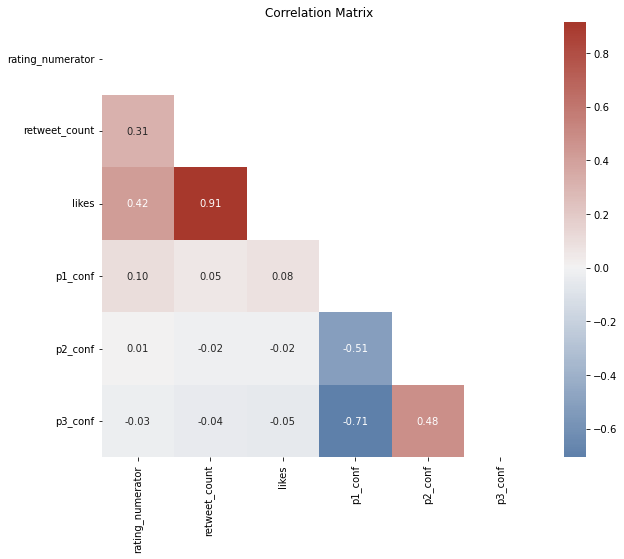

In [62]:
# view matrix correlation to see interaction between useful numeric variables
matrix = twitter_df[['rating_numerator','retweet_count','likes','p1_conf','p2_conf','p3_conf']].corr()

plt.figure(figsize=(10,8))
plt.title("Correlation Matrix")

mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9,
                             center="light", as_cmap=True)

sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f',
            square=True, cmap=cmap);

The correlation matrix above reveals a strong positive corellation between likes and retweet_counts in the dataset. The correlation is shown in a scatter plot below.

Prediction 1 confidence level (p1_conf) has a negative correlation with Prediction 3 confidence level (p3-conf) but predition 2 and 3 confidence levels show a little positive correlation. This indicates the insight based on prediction 2 and 3 are going to be quite similar, with both being different from what will be observed from those based on prediction 3. A scatter plot of prediction 1 versus prediction 2 confidence levels is below.

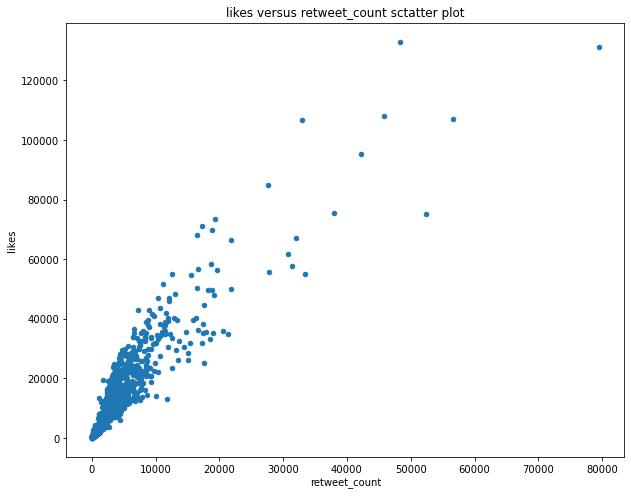

In [63]:
twitter_df.plot.scatter(x='retweet_count', y='likes', figsize=(10,8))
plt.title('likes versus retweet_count sctatter plot');

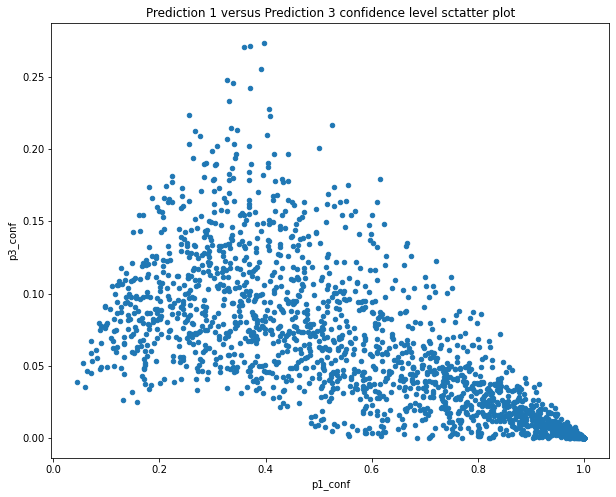

In [64]:
twitter_df.plot.scatter(x='p1_conf', y='p3_conf', figsize=(10,8))
plt.title('Prediction 1 versus Prediction 3 confidence level sctatter plot');

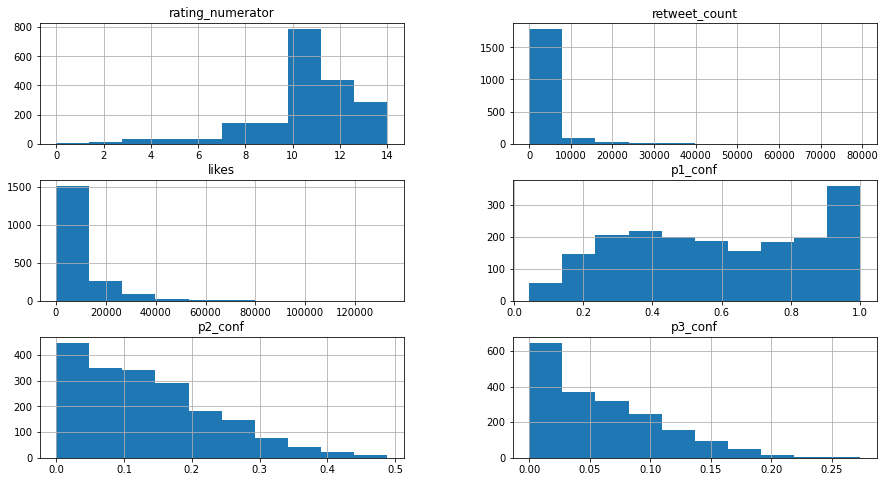

In [65]:
# data distribution of some columns of interest
twitter_df[['rating_numerator','retweet_count','likes','p1_conf','p2_conf','p3_conf','dog_stage']].hist(figsize=(15,8));

In [66]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1914 non-null   int64         
 1   timestamp           1914 non-null   datetime64[ns]
 2   source              1914 non-null   object        
 3   text                1914 non-null   object        
 4   rating_numerator    1914 non-null   float64       
 5   rating_denominator  1914 non-null   int64         
 6   dog_stage           301 non-null    category      
 7   retweet_count       1914 non-null   int64         
 8   likes               1914 non-null   int64         
 9   language            1914 non-null   object        
 10  jpg_url             1914 non-null   object        
 11  img_num             1914 non-null   int64         
 12  p1_dog_breed        1914 non-null   object        
 13  p1_conf             1914 non-null   float64     

In [67]:
# sum of retweets for each dog stage
twitter_df[twitter_df.dog_stage != "None"].groupby('dog_stage')['retweet_count'].sum().sort_values(ascending=False).head

<bound method NDFrame.head of dog_stage
pupper          478883
doggo           448919
puppo           142427
floofer          34781
doggo pupper     33913
doggo puppo      19196
Name: retweet_count, dtype: int64>

In [68]:
# sum of likes for each dog stage
twitter_df[twitter_df.dog_stage != "None"].groupby('dog_stage')['likes'].sum().sort_values(ascending=False)

dog_stage
pupper          1457356
doggo           1219452
puppo            474806
doggo pupper     100910
floofer           92442
doggo puppo       47844
Name: likes, dtype: int64

In [69]:
# create dog_stage group variable for exploration below
dog_stage_group = twitter_df.groupby('dog_stage')

In [70]:
# mean prediction accuracy per dog stage for first prediction
dog_stage_group['p1_conf'].mean().sort_values(ascending=False)

dog_stage
doggo pupper    0.819434
puppo           0.722293
floofer         0.609204
pupper          0.605832
doggo           0.577058
doggo puppo     0.321676
Name: p1_conf, dtype: float64

In [71]:
# mean prediction accuracy per dog stage for second prediction
dog_stage_group['p2_conf'].mean().sort_values(ascending=False)

dog_stage
doggo           0.157341
floofer         0.155319
puppo           0.135468
pupper          0.130416
doggo puppo     0.115138
doggo pupper    0.095646
Name: p2_conf, dtype: float64

In [72]:
# mean prediction accuracy per dog stage for third prediction
dog_stage_group['p3_conf'].mean().sort_values(ascending=False)

dog_stage
doggo puppo     0.096100
doggo           0.062083
pupper          0.055902
floofer         0.047997
puppo           0.043701
doggo pupper    0.032152
Name: p3_conf, dtype: float64

In [73]:
# median prediction accuracy per dog stage for first prediction
dog_stage_group['p1_conf'].median().sort_values(ascending=False)

dog_stage
doggo pupper    0.843799
puppo           0.733124
pupper          0.656616
doggo           0.571229
floofer         0.457356
doggo puppo     0.321676
Name: p1_conf, dtype: float64

In [74]:
# median prediction accuracy per dog stage for second prediction
dog_stage_group['p2_conf'].median().sort_values(ascending=False)

dog_stage
doggo           0.130948
doggo puppo     0.115138
pupper          0.108807
floofer         0.108382
puppo           0.080540
doggo pupper    0.052956
Name: p2_conf, dtype: float64

In [75]:
# median prediction accuracy per dog stage for third prediction
dog_stage_group['p3_conf'].median().sort_values(ascending=False)

dog_stage
doggo puppo     0.096100
doggo           0.048039
floofer         0.045426
pupper          0.042848
puppo           0.030347
doggo pupper    0.021953
Name: p3_conf, dtype: float64

In [76]:
# median rating per dog stage
dog_stage_group['rating_numerator'].median()

dog_stage
doggo           12.0
doggo pupper    12.0
doggo puppo     13.0
floofer         12.0
pupper          11.0
puppo           12.0
Name: rating_numerator, dtype: float64

In [77]:
# mean rating per dog stage
dog_stage_group['rating_numerator'].mean().sort_values(ascending=False)

dog_stage
doggo puppo     13.000000
floofer         12.000000
puppo           12.000000
doggo           11.888889
doggo pupper    11.857143
pupper          10.638159
Name: rating_numerator, dtype: float64

In [78]:
# first three breeds in pupper stage with the highest likes, based on first prediction
dog_stage_group.get_group('pupper').groupby('p1_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
French_bulldog        131626
golden_retriever      123566
Labrador_retriever     87796
Name: likes, dtype: int64

In [79]:
# first three breeds in doggo stage with the highest likes, based on first prediction
dog_stage_group.get_group('doggo').groupby('p1_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
golden_retriever      184533
Labrador_retriever    182448
standard_poodle        95450
Name: likes, dtype: int64

In [80]:
# first three breeds in puppo stage with the highest likes, based on first prediction
dog_stage_group.get_group('puppo').groupby('p1_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
Lakeland_terrier    132810
Rottweiler           56413
Pembroke             38818
Name: likes, dtype: int64

In [81]:
# first three breeds in floofer stage with the highest likes, based on first prediction
dog_stage_group.get_group('floofer').groupby('p1_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
Samoyed             44647
chow                22986
golden_retriever    12456
Name: likes, dtype: int64

In [82]:
# first three breeds in doggo pupper stage with the highest likes, based on first prediction
dog_stage_group.get_group('doggo pupper').groupby('p1_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
golden_retriever          71282
curly-coated_retriever    11901
dalmatian                  8992
Name: likes, dtype: int64

In [83]:
# first three breeds in doggo puppo stage with the highest likes, based on first prediction
dog_stage_group.get_group('doggo puppo').groupby('p1_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
flat-coated_retriever    47844
Name: likes, dtype: int64

In [84]:
# first prediction dog breed with the highest like
twitter_df.groupby('p1_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
golden_retriever      1641304
Labrador_retriever    1042813
Pembroke               982634
Name: likes, dtype: int64

In [85]:
# second prediction dog breed with the highest like
twitter_df.groupby('p2_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p2_dog_breed
Labrador_retriever    1432007
golden_retriever       849758
Cardigan               788251
Name: likes, dtype: int64

In [86]:
# second prediction dog breed with the highest like
twitter_df.groupby('p3_dog_breed')['likes'].sum().sort_values(ascending=False).head(3)

p3_dog_breed
Labrador_retriever    684244
Chihuahua             460610
kelpie                368173
Name: likes, dtype: int64

In [87]:
# first three breeds in pupper dog class with the highest retweet, based on first prediction
dog_stage_group.get_group('pupper').groupby('p1_dog_breed')['retweet_count'].sum().sort_values(ascending=False).head(3)

p1_dog_breed
golden_retriever    38150
Pembroke            37641
French_bulldog      36909
Name: retweet_count, dtype: int64

From the master twitter dataset, the count of the classification of the dogs are as follows;

In [88]:
dog_stage_distribution = dog_stage_group['tweet_id'].count().sort_values(ascending=False)
dog_stage_distribution

dog_stage
pupper          201
doggo            63
puppo            22
doggo pupper      7
floofer           7
doggo puppo       1
Name: tweet_id, dtype: int64

As seen from above, the records in the dataset where dog stages are known is not evely distributed among the dog stages. A histogram of the distribution of records for each class is shown below.

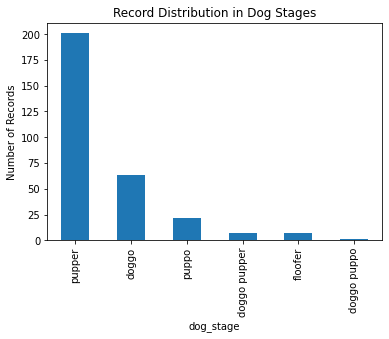

In [89]:
dog_stage_distribution.plot(kind="bar")
plt.title('Record Distribution in Dog Stages')
plt.ylabel('Number of Records');

### Insights:
1. For all the dog stages, pupper had more retweet counts followed by doggo. The rest come in the order puppo, floofer, doggo pupper, doggo puppo. This also reflets their order of number of records except doggo pupper had more records than floofer but floofer had more retweets.

2. For likes, tweet relating to pupper had the highest, followed by doggo, then puppo before doggo pupper, and next is floofer before doggo puppo

3. Records of dogs in pupper stage where more than others but its mean is 4th in first algorithm prediction confidence level. On a reverse case doggo pupper was 4th in number of records distribution but had the highest prediction confidence level mean with the first algorithm. But in the other two predictions, pupper had a higher confidence level mean. Almost similar pattern is observed with the median of each dog stage for each prediction, where pupper stage is better in first algorithm and not so better in second and third algorithm's confidence level.

4. Considering dog breeds by first prediction algorithm, breeds with the highest likes for the dog stages are as follows;
- French_bulldog (131,626 likes) for pupper
- Golden_retriever (184,533 likes) for doggo
- Lakeland_terrier (132,810 likes) for puppo
- Samoyed (44,647 likes) for floofer
- golden_retriever (71282 likes) for doggo pupper
- flat-coated_retriever (47844 likes) for doggo puppo

5. Of all dog breeds predicted from the tweets in the dataset, Golden_retriever, had the most likes in prediction 1 while it was Labrador_retriever for prediction 2 and 3. One is likely to go with prediction 1 since the median and mean confidence level is better than the other two predictions.

### Visualization

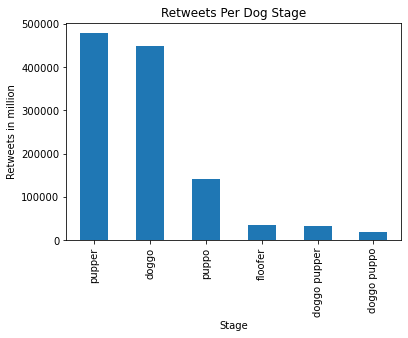

In [90]:
# Retweets Per Dog Stage
twitter_df[twitter_df.dog_stage != "None"].groupby('dog_stage')['retweet_count'].sum().sort_values(ascending=False).plot(kind = "bar")
plt.title('Retweets Per Dog Stage')
plt.xlabel('Stage')
plt.ylabel("Retweets in million");

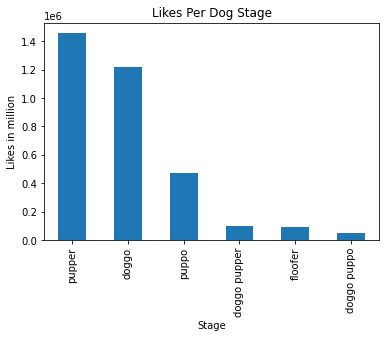

In [91]:
# Likes Per Dog Stage
twitter_df[twitter_df.dog_stage != "None"].groupby('dog_stage')['likes'].sum().sort_values(ascending=False).plot(kind = "bar")
plt.title('Likes Per Dog Stage')
plt.xlabel('Stage')
plt.ylabel("Likes in million");

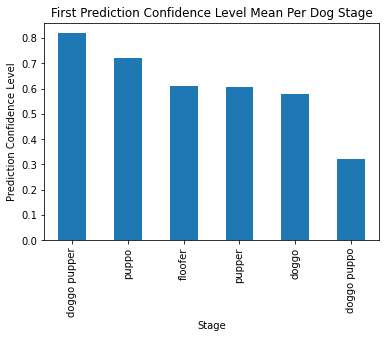

In [92]:
# first prediction confidence level mean per dog stage
dog_stage_group['p1_conf'].mean().sort_values(ascending=False).plot(kind = "bar")
plt.title('First Prediction Confidence Level Mean Per Dog Stage')
plt.xlabel('Stage')
plt.ylabel("Prediction Confidence Level");

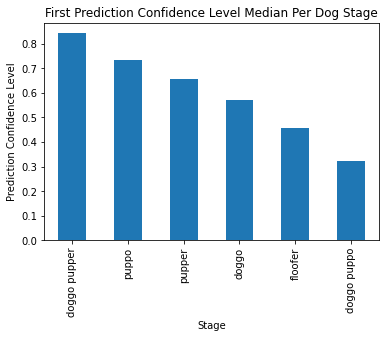

In [93]:
# first prediction confidence level median per dog stage
dog_stage_group['p1_conf'].median().sort_values(ascending=False).plot(kind = "bar")
plt.title('First Prediction Confidence Level Median Per Dog Stage')
plt.xlabel('Stage')
plt.ylabel("Prediction Confidence Level");

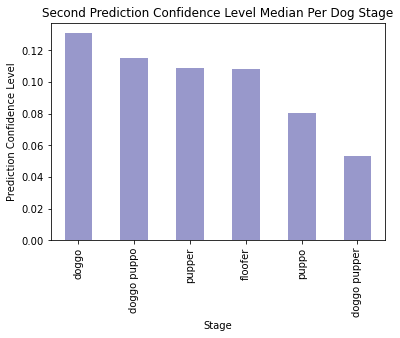

In [94]:
# second prediction confidence level median per dog stage
dog_stage_group['p2_conf'].median().sort_values(ascending=False).plot(kind = "bar", color=(0.2, 0.2, 0.6, 0.5))
plt.title('Second Prediction Confidence Level Median Per Dog Stage')
plt.xlabel('Stage')
plt.ylabel("Prediction Confidence Level");

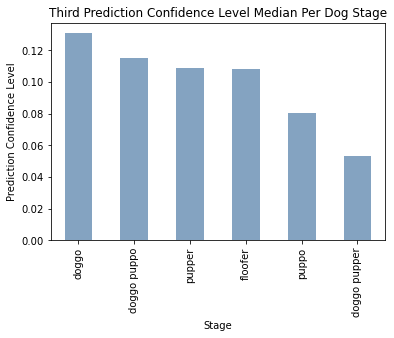

In [95]:
# third prediction confidence level median per dog stage
dog_stage_group['p2_conf'].median().sort_values(ascending=False).plot(kind = "bar", color=(0.2, 0.4, 0.6, 0.6))
plt.title('Third Prediction Confidence Level Median Per Dog Stage')
plt.xlabel('Stage')
plt.ylabel("Prediction Confidence Level");